In [1]:
import cv2
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


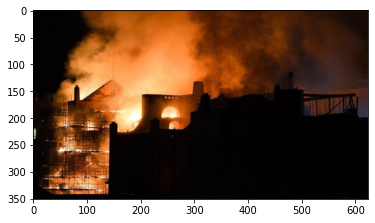

In [2]:
img = Image.open('/Users/upasanathakuria/Desktop/KocharTech/Fire-Smoke-Detection/test-imgs/7_fire.jpg')
plt.imshow(img)
plt.show()

In [3]:
#Detection on images
#Print FIRE, NEUTRAL or SMOKE using cv2  
#EfiicientNetB4(val acc 95%) better to identify NEUTRAL images
#EfficientNetB7(val acc 95%) better to identify Fire+Smoke images, FIRE traning dataset also has smoke in the images
#ResNet50(val acc 91.5%) is similar to EfficientDetB7, detectes FIRE+SMOKE but not Neutral images properly.

#Load any h5 file trained on fire-smoke dataset: Custom1_firesmokedetectormodel.h5, ResNet50_firesmokedetectormodel.h5, EfficientNetB7_firesmokedetectormodel.h5, EfficientNetB4_firesmokedetectormodel.h5, MibileNetV2_firesmokedetectormodel.h5

model=tf.keras.models.load_model(r"ResNet50_firesmokedetectormodel.h5") #use any h5 files

img1 = cv2.imread("/Users/upasanathakuria/Desktop/KocharTech/Fire-Smoke-Detection/test-imgs/7_fire.jpg")
img = cv2.resize(img1,(120,120)) 
x = image.img_to_array(img)
x = np.expand_dims(img, axis=0)

images = np.vstack([x])
classes = model.predict(x, batch_size=8)
#print(classes)
classes = np.argmax(classes, axis = 1)
#print(classes)
classes = classes[0]
cv2.imshow("output",img1)
#print(classes)
if classes == 0:
    print("FIRE & SMOKE")
    if cv2.waitKey(2500) & 0xFF == ord('q'):
        cv2.destroyAllWindows()

elif classes == 1:
    print("NEUTRAL")
    if cv2.waitKey(2500) & 0xFF == ord('q'):
        cv2.destroyAllWindows()

elif classes == 2:
    print("SMOKE")
    if cv2.waitKey(2500) & 0xFF == ord('q'):
        cv2.destroyAllWindows()


FIRE & SMOKE


In [2]:
#Detection on video

cap=cv2.VideoCapture('/Users/upasanathakuria/Desktop/KocharTech/Fire-Smoke-Detection/posVideo11.870.mp4')
while True:
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
    
    ret,frame=cap.read()
    model=tf.keras.models.load_model(r'EfficientNetB7_firesmokedetectormodel.h5')
    if ret==True:
        img = cv2.resize(frame,(120,120)) 
        x = image.img_to_array(img)
        x = np.expand_dims(img, axis=0)

        images = np.vstack([x])
        classes = model.predict(x, batch_size=4)
        classes = np.argmax(classes, axis = 1)
        classes = classes[0]
        if classes == 0:
            print("fire")
            cv2.putText(frame, 'FIRE', (0, 185), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)
        elif classes == 1:
            print("neutral")
            cv2.putText(frame, 'NEUTRAL', (0, 185), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)
        elif classes == 2:
            print("smoke")
            cv2.putText(frame, 'SMOKE', (0, 185), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imshow("output",frame)


fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
fire
